In [14]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
def func_model_training(model,x,y):
    num_epochs=20000
    epoch_list=list()
    loss_list=list()
    epoch_iter=1
    while(True):
        predicted_y = model(x)
        loss=loss_function(predicted_y,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_list.append(epoch_iter)
        loss_list.append(loss.detach().numpy())
    
        if epoch_iter % 500 == 0: 
            print("epoch: ",epoch_iter,", loss = {0:.5f}".format(loss.item()),", convergence = "+str(abs(loss_list[-1]-loss_list[-2])))
        if(epoch_iter>=num_epochs):
            print("reached max epochs")
            break
        elif (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_list[-1])
                break
        epoch_iter +=1
    return epoch_list,loss_list,predicted_y

# First Function

In [16]:
# First Function 
x=np.expand_dims(np.arange(-1.5, 1.5, 0.0005),1) 
y=np.sinc(5*x)

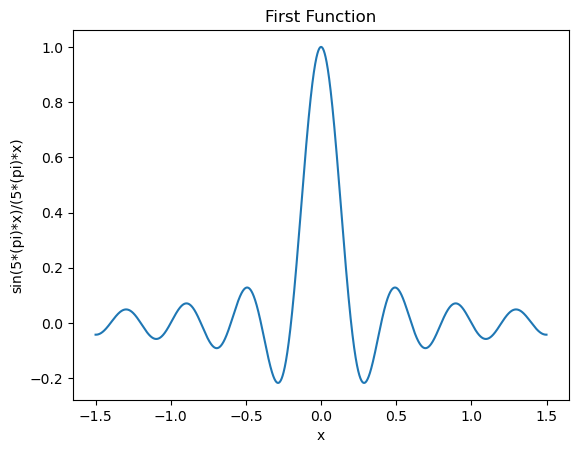

In [17]:
# Plot of First Function
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(x,y)
plt.title("First Function")
plt.xlabel("x")
plt.ylabel("sin(5*(pi)*x)/(5*(pi)*x)")
plt.show()

# NN Deep Model 

In [18]:
class NN1(nn.Module):
    def __init__(self,):
        super(NN1,self).__init__()
        self.l1 = nn.Linear(1,6)
        self.l2 = nn.Linear(6,8)
        self.l3 = nn.Linear(8,10)
        self.l4 = nn.Linear(10,10)
        self.l5 = nn.Linear(10,10)
        self.l6 = nn.Linear(10,10)
        self.l7 = nn.Linear(10,8)
        self.l8 = nn.Linear(8,6)
        self.output = nn.Linear(6,1)
    
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=F.leaky_relu(self.l2(x))
        x=F.leaky_relu(self.l3(x))
        x=F.leaky_relu(self.l4(x))
        x=F.leaky_relu(self.l5(x))
        x=F.leaky_relu(self.l6(x))
        x=F.leaky_relu(self.l7(x))
        x=F.leaky_relu(self.l8(x))
        x=self.output(x)
        
        return x

In [19]:
learning_rate=0.001
wd = 1e-4
nn1=NN1()
optimizer= torch.optim.RMSprop(nn1.parameters(), lr=learning_rate, weight_decay=wd)
loss_function = nn.MSELoss()
total_params_nn1=sum(p.numel() for p in nn1.parameters())
print(total_params_nn1)
nn1_epoch_list, nn1_loss_list, nn1_predict_list = func_model_training(nn1, x, y)

637
epoch:  500 , loss = 0.00558 , convergence = 6.7288056e-07
epoch:  1000 , loss = 0.00447 , convergence = 2.8782524e-06
epoch:  1500 , loss = 0.00340 , convergence = 0.00017120014
epoch:  2000 , loss = 0.00269 , convergence = 1.1215452e-06
epoch:  2500 , loss = 0.00263 , convergence = 6.6393986e-06
epoch:  3000 , loss = 0.00261 , convergence = 6.51367e-06
epoch:  3500 , loss = 0.00258 , convergence = 4.3534674e-06
epoch:  4000 , loss = 0.00252 , convergence = 1.2575183e-05
epoch:  4500 , loss = 0.00240 , convergence = 2.5220215e-05
epoch:  5000 , loss = 0.00224 , convergence = 1.8682331e-06
epoch:  5500 , loss = 0.00202 , convergence = 2.129702e-06
epoch:  6000 , loss = 0.00184 , convergence = 3.338675e-06
epoch:  6500 , loss = 0.00174 , convergence = 4.0641753e-06
epoch:  7000 , loss = 0.00168 , convergence = 4.733447e-06
epoch:  7500 , loss = 0.00166 , convergence = 3.9464794e-06
epoch:  8000 , loss = 0.00163 , convergence = 1.2937002e-05
epoch:  8500 , loss = 0.00159 , convergenc

# NN Moderate Deep Model

In [20]:
class NN2(nn.Module):
    def __init__(self,):
        super(NN2,self).__init__()
        self.l1 = nn.Linear(1,14)
        self.l2 = nn.Linear(14,20)
        self.l3 = nn.Linear(20,14)
        self.output = nn.Linear(14,1)
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=F.leaky_relu(self.l2(x))
        x=F.leaky_relu(self.l3(x))
        x=self.output(x)
        return x

In [21]:
learning_rate=0.001
nn2=NN2()
wd = 1e-4
optimizer= torch.optim.RMSprop(nn2.parameters(), lr=learning_rate, weight_decay=wd)
loss_function = nn.MSELoss()
total_params_nn2=sum(p.numel() for p in nn2.parameters())
print(total_params_nn2)
nn2_epoch_list, nn2_loss_list, nn2_predict_list = func_model_training(nn2, x, y)

637
epoch:  500 , loss = 0.00493 , convergence = 8.106697e-06
epoch:  1000 , loss = 0.00392 , convergence = 4.2463653e-06
epoch:  1500 , loss = 0.00327 , convergence = 3.3332035e-06
epoch:  2000 , loss = 0.00291 , convergence = 2.2274908e-06
epoch:  2500 , loss = 0.00266 , convergence = 1.4905818e-06
epoch:  3000 , loss = 0.00241 , convergence = 1.0933727e-05
epoch:  3500 , loss = 0.00225 , convergence = 3.1995587e-06
epoch:  4000 , loss = 0.00212 , convergence = 2.7904753e-06
epoch:  4500 , loss = 0.00205 , convergence = 5.3269323e-06
epoch:  5000 , loss = 0.00187 , convergence = 3.2006064e-06
epoch:  5500 , loss = 0.00167 , convergence = 1.3096724e-06
epoch:  6000 , loss = 0.00156 , convergence = 6.6589564e-07
epoch:  6500 , loss = 0.00150 , convergence = 1.7050188e-06
epoch:  7000 , loss = 0.00146 , convergence = 2.1544984e-06
epoch:  7500 , loss = 0.00142 , convergence = 2.1198066e-06
epoch:  8000 , loss = 0.00140 , convergence = 9.80997e-06
epoch:  8500 , loss = 0.00123 , converge


# NN Shallow Model



In [22]:
class NN3(nn.Module):
    def __init__(self,):
        super(NN3,self).__init__()
        self.l1 = nn.Linear(1,212)
        self.output = nn.Linear(212,1)
    
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=self.output(x)
        return x

In [23]:
learning_rate=0.001
wd = 1e-4
nn3=NN3()
optimizer= torch.optim.RMSprop(nn3.parameters(), lr=learning_rate, weight_decay=wd)
loss_function = nn.MSELoss()
total_params_nn3=sum(p.numel() for p in nn3.parameters())
print(total_params_nn3)
nn3_epoch_list, nn3_loss_list, nn3_predict_list = func_model_training(nn3, x, y)

637
epoch:  500 , loss = 0.03099 , convergence = 2.0768493e-05
epoch:  1000 , loss = 0.02173 , convergence = 2.0623207e-05
epoch:  1500 , loss = 0.01670 , convergence = 1.8011779e-06
epoch:  2000 , loss = 0.01367 , convergence = 4.2514876e-06
epoch:  2500 , loss = 0.01156 , convergence = 2.4382025e-06
epoch:  3000 , loss = 0.01007 , convergence = 8.502975e-07
epoch:  3500 , loss = 0.00903 , convergence = 1.3438985e-06
epoch:  4000 , loss = 0.00821 , convergence = 5.271286e-07
epoch:  4500 , loss = 0.00761 , convergence = 1.4402904e-06
epoch:  5000 , loss = 0.00716 , convergence = 3.6181882e-07
epoch:  5500 , loss = 0.00677 , convergence = 1.1976808e-06
epoch:  6000 , loss = 0.00649 , convergence = 4.115049e-06
epoch:  6500 , loss = 0.00625 , convergence = 3.1478703e-07
epoch:  7000 , loss = 0.00603 , convergence = 4.175119e-06
epoch:  7500 , loss = 0.00585 , convergence = 2.6389025e-06
epoch:  8000 , loss = 0.00573 , convergence = 7.0338137e-06
epoch:  8500 , loss = 0.00563 , convergen

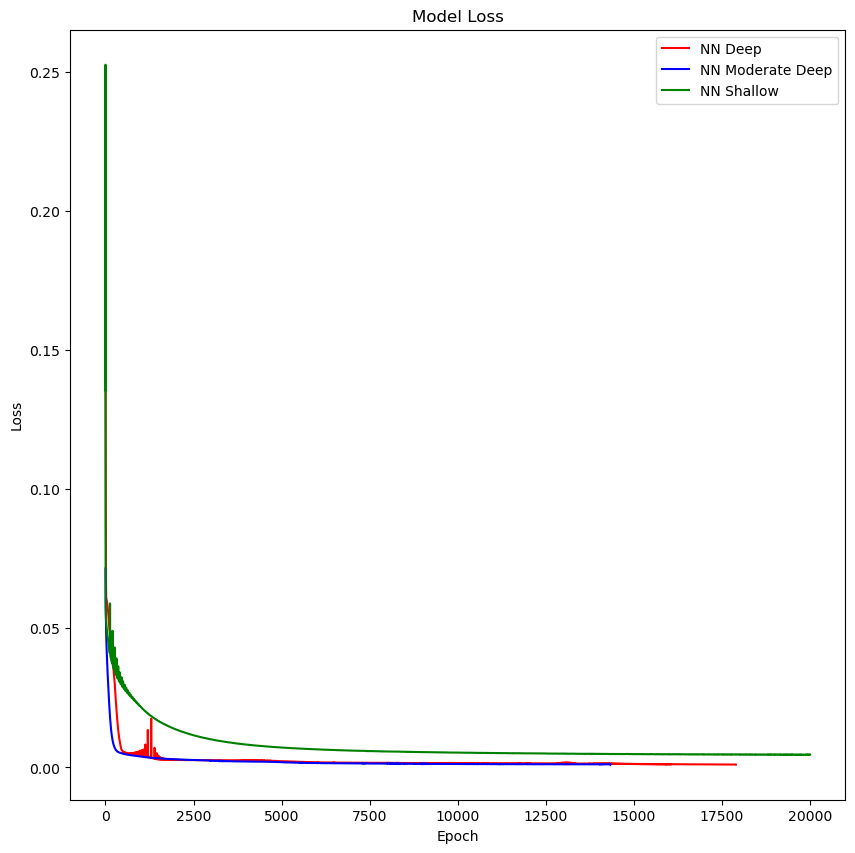

In [24]:
plt.figure(figsize=(10,10))
plt.plot(nn1_epoch_list, nn1_loss_list, color = "r")
plt.plot(nn2_epoch_list, nn2_loss_list, color = "b")
plt.plot(nn3_epoch_list, nn3_loss_list, color = "g")
plt.title('Model Loss')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

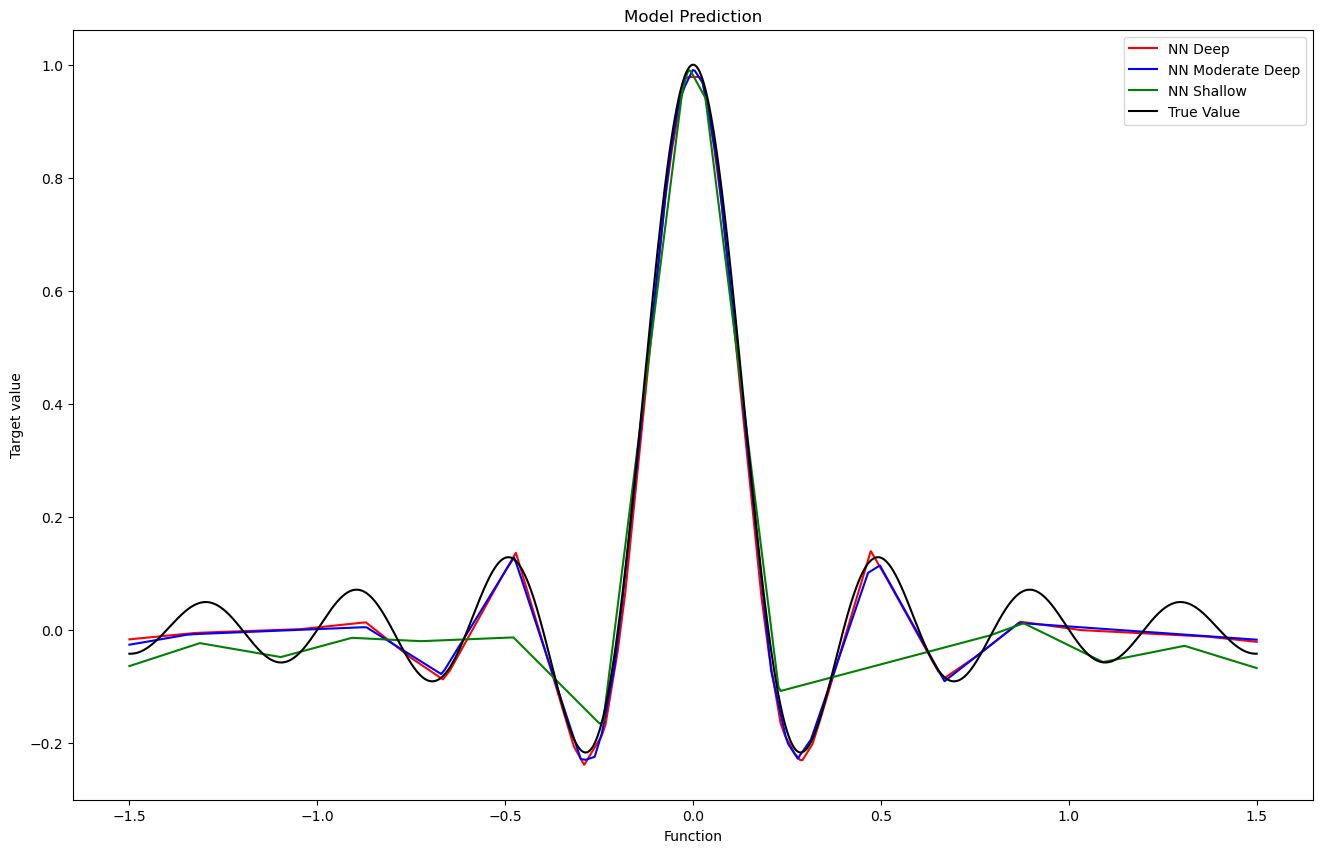

In [25]:
plt.figure(figsize=(16,10))
plt.plot(x,nn1_predict_list.data, color = "r")
plt.plot(x, nn2_predict_list.data, color = "b")
plt.plot(x, nn3_predict_list.data, color = "g")
plt.plot(x, y, color = "black")
plt.title('Model Prediction')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow','True Value'])
plt.xlabel('Function')
plt.ylabel('Target value')
plt.show()

In [31]:
# Second Function 
x1=np.expand_dims(np.arange(-1.5, 1.5, 0.001),1) 
y1=np.sign(np.cos(5*(np.pi)*x1))

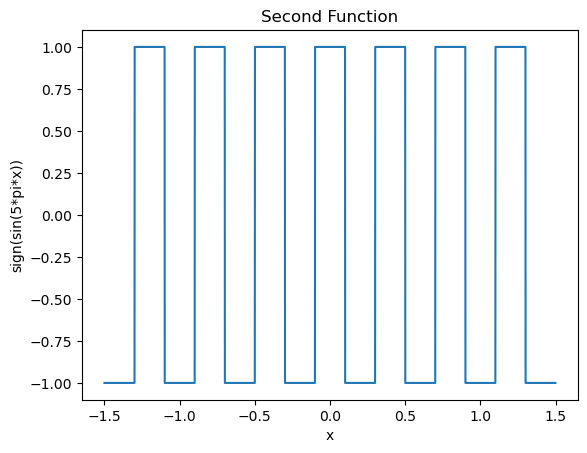

In [32]:
# Plot of First Function
x1, y1 = torch.tensor(x1, dtype=torch.float32), torch.tensor(y1, dtype=torch.float32)
plt.plot(x1,y1)
plt.title("Second Function")
plt.xlabel("x")
plt.ylabel("sign(sin(5*pi*x))")
plt.show()

In [33]:
learning_rate=0.001
nn4=NN1()
optimizer= torch.optim.RMSprop(nn4.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
total_params_nn4=sum(p.numel() for p in nn4.parameters())
print(total_params_nn4)
nn4_epoch_list, nn4_loss_list, nn4_predict_list = func_model_training(nn4, x1, y1)

637
epoch:  500 , loss = 0.83415 , convergence = 0.0001603961
epoch:  1000 , loss = 0.53956 , convergence = 0.0057988167
epoch:  1500 , loss = 0.47789 , convergence = 0.001690656
epoch:  2000 , loss = 0.48753 , convergence = 0.008078843
epoch:  2500 , loss = 0.47569 , convergence = 0.00842151
epoch:  3000 , loss = 0.46844 , convergence = 0.009690672
epoch:  3500 , loss = 0.45522 , convergence = 0.006477952
epoch:  4000 , loss = 0.46327 , convergence = 0.009913802
epoch:  4500 , loss = 0.45645 , convergence = 0.012295514
epoch:  5000 , loss = 0.44626 , convergence = 0.011715144
epoch:  5500 , loss = 0.44546 , convergence = 0.013177097
epoch:  6000 , loss = 0.43442 , convergence = 0.013612181
epoch:  6500 , loss = 0.44670 , convergence = 0.027487993
epoch:  7000 , loss = 0.43533 , convergence = 0.027372867
epoch:  7500 , loss = 0.41514 , convergence = 0.02811575
epoch:  8000 , loss = 0.38310 , convergence = 0.03302881
epoch:  8500 , loss = 0.27746 , convergence = 0.0056292713
epoch:  900

In [34]:
learning_rate=0.001
nn5=NN2()
optimizer= torch.optim.RMSprop(nn5.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
total_params_nn5=sum(p.numel() for p in nn5.parameters())
print(total_params_nn5)
nn5_epoch_list, nn5_loss_list, nn5_predict_list = func_model_training(nn5, x1, y1)

637
epoch:  500 , loss = 0.89498 , convergence = 5.1379204e-05
epoch:  1000 , loss = 0.72613 , convergence = 0.0026557446
epoch:  1500 , loss = 0.62005 , convergence = 0.00074899197
epoch:  2000 , loss = 0.55232 , convergence = 0.00071269274
epoch:  2500 , loss = 0.49593 , convergence = 0.0022561848
epoch:  3000 , loss = 0.46516 , convergence = 0.0005271435
epoch:  3500 , loss = 0.44300 , convergence = 0.00039869547
epoch:  4000 , loss = 0.43058 , convergence = 0.0002978146
epoch:  4500 , loss = 0.41947 , convergence = 0.00012803078
epoch:  5000 , loss = 0.41588 , convergence = 0.00037890673
epoch:  5500 , loss = 0.40807 , convergence = 0.00025457144
epoch:  6000 , loss = 0.40793 , convergence = 0.000102460384
epoch:  6500 , loss = 0.40442 , convergence = 7.6293945e-06
epoch:  7000 , loss = 0.39825 , convergence = 0.0001257956
epoch:  7500 , loss = 0.39784 , convergence = 0.00033080578
epoch:  8000 , loss = 0.39342 , convergence = 3.924966e-05
epoch:  8500 , loss = 0.39188 , convergenc

In [35]:
learning_rate=0.001
nn6=NN3()
optimizer= torch.optim.RMSprop(nn6.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
total_params_nn6=sum(p.numel() for p in nn6.parameters())
print(total_params_nn6)
nn6_epoch_list, nn6_loss_list, nn6_predict_list = func_model_training(nn6, x1, y1)

637
epoch:  500 , loss = 0.89071 , convergence = 0.00019663572
epoch:  1000 , loss = 0.85293 , convergence = 4.863739e-05
epoch:  1500 , loss = 0.82871 , convergence = 4.9471855e-05
epoch:  2000 , loss = 0.81004 , convergence = 4.4226646e-05
epoch:  2500 , loss = 0.79329 , convergence = 5.1915646e-05
epoch:  3000 , loss = 0.77725 , convergence = 3.8981438e-05
epoch:  3500 , loss = 0.76151 , convergence = 6.6161156e-05
epoch:  4000 , loss = 0.74650 , convergence = 7.212162e-06
epoch:  4500 , loss = 0.73195 , convergence = 5.4001808e-05
epoch:  5000 , loss = 0.71797 , convergence = 2.8252602e-05
epoch:  5500 , loss = 0.70436 , convergence = 3.117323e-05
epoch:  6000 , loss = 0.69131 , convergence = 1.7166138e-05
epoch:  6500 , loss = 0.67891 , convergence = 1.513958e-05
epoch:  7000 , loss = 0.66691 , convergence = 1.3232231e-05
epoch:  7500 , loss = 0.65516 , convergence = 3.4749508e-05
epoch:  8000 , loss = 0.64416 , convergence = 2.7120113e-05
epoch:  8500 , loss = 0.63370 , convergen

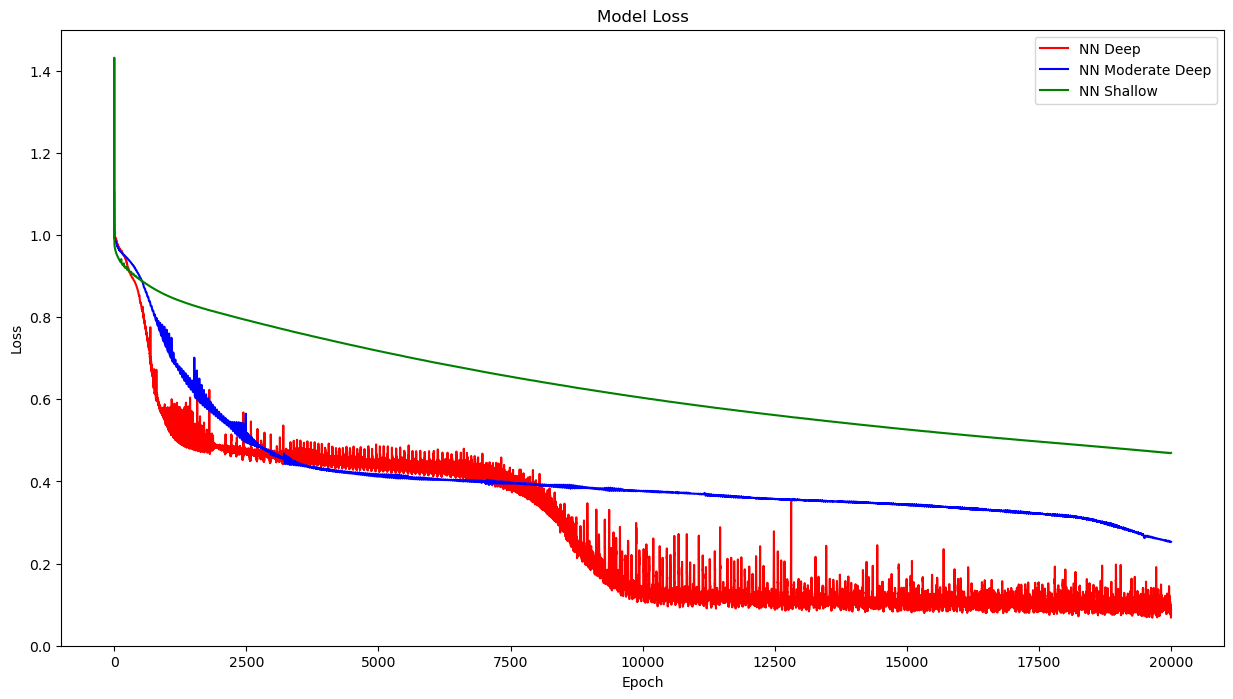

In [36]:
plt.figure(figsize=(15,8))
plt.plot(nn4_epoch_list, nn4_loss_list, color = "r")
plt.plot(nn5_epoch_list, nn5_loss_list, color = "b")
plt.plot(nn6_epoch_list, nn6_loss_list, color = "g")
plt.title('Model Loss')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

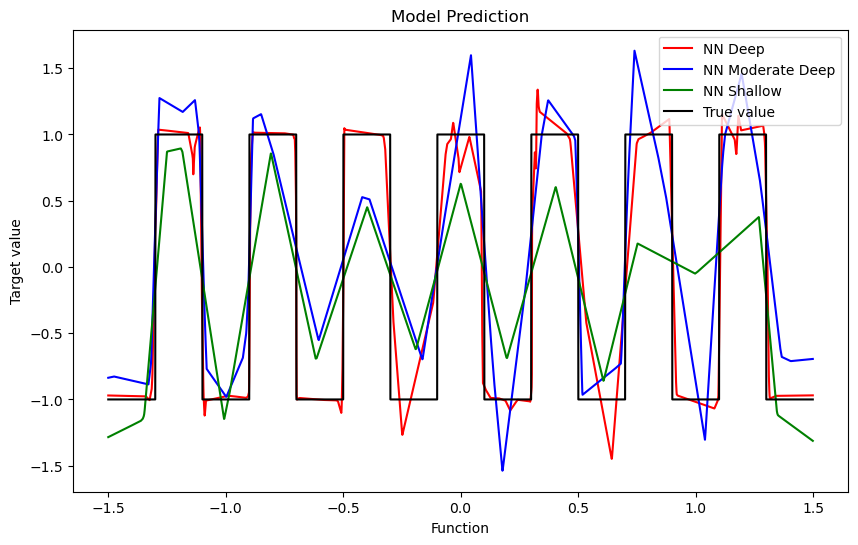

In [37]:
plt.figure(figsize=(10,6))
plt.plot(x1, nn4_predict_list.data, color = "r")
plt.plot(x1, nn5_predict_list.data, color = "b")
plt.plot(x1, nn6_predict_list.data, color = "g")
plt.plot(x1, y1, color = "black")
plt.title('Model Prediction')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow',"True value"])
plt.xlabel('Function')
plt.ylabel('Target value')
plt.show()